# CNN Layers

In this notebook, we're going to create one convolutional and one maxpooling layer, apply these to an input image, and visualize the output, so that we can better understand the function of each layer of a convolutional neural network.

<img src='images/CNN_all_layers.png' height=60% width=60% />

## Import libraries and display an image

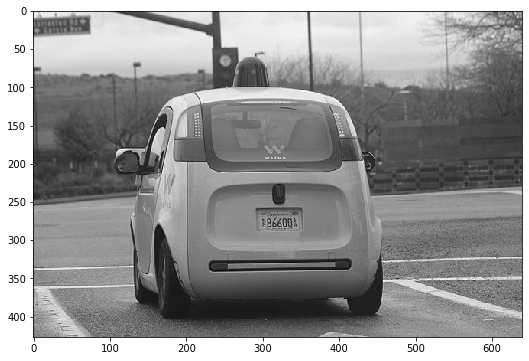

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# default figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Select an image by file name
img_path = 'images/waymo_car.jpg'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale using OpenCV
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries from [0,255] to [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

## Define and visualize some filters

Here we define 3 different filters, these filters will be applied to the input image and form a convolutional layer. In this example, we'll *explicitly* define the weights of each filter, but in a trained neural network, these weight values will be *learned*.

<img src='images/3_filters.png' height=50% width=50% />

In [3]:
import numpy as np

# define the convolutional kernels as numpy arrays

# horizontal edge detector
filter_1 = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

# general edge detector
filter_2 = np.array([[0, -1, 0], 
                     [-1, 4, -1], 
                     [0, -1, 0]])

# vertical edge detector
filter_3 = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])


# create a list of all three filters
filters = np.array([filter_1, filter_2, filter_3])

# as an example, print out the values of filter 1
print('Filter 1: \n', filters[0])

Filter 1: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


---
# Define convolutional and pooling layers

The various layers that make up any neural network are documented, [here](http://pytorch.org/docs/master/nn.html). For a convolutional neural network, we'll start by defining a:
* Convolutional layer
* Maxpooling layer

### `__init__` and `forward`
To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the forward behavior of a network that applyies those initialized layers to an input (`x`) in the function `forward`. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python. 

Below, I define the structure of a class called `Net` that has a convolutional layer that can contain three 3x3 grayscale filters.

In [4]:
# import PyTorch framework
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # define a conv layer with three, 3x3 grayscale filters
        # each layer is defined by self.layer_name(input_depth, output_depth)
        # in this case, the input depth is 1 (for a grasycale image) 
        # and the output depth is 3 for 3 filtered image outputs
        n_filters = 3
        self.conv = nn.Conv2d(1, n_filters, kernel_size=(3, 3), bias=False)
        
        # set the weights
        self.conv.weight = torch.nn.Parameter(weight)
        
        # define a maxpooling layer
        # this has a patch size of 2x2 and a stride of 2
        self.pool = nn.MaxPool2d(2, 2)
                

    # define the forward behavior of the model
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
              
        # returns all layers
        return conv_x, activated_x, pooled_x


ModuleNotFoundError: No module named 'torch'

In [34]:
# instantiate the model and set the weights to be those from our pre-define filters
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layers in the network
print(model)

Net(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


---
# Visualize the output of each layer

In this notebook, I've created a file `helpers.py` that contains some visualization code. It contains functions for displaying filters and a function called `viz_layer` that takes in a specific layer and number of filters, `n_filters` (an optional argument with a default of 3), and displays the output of that layer once an image has been passed through.

## Convolutional layer

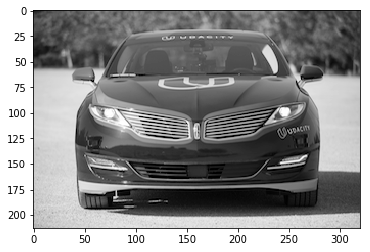

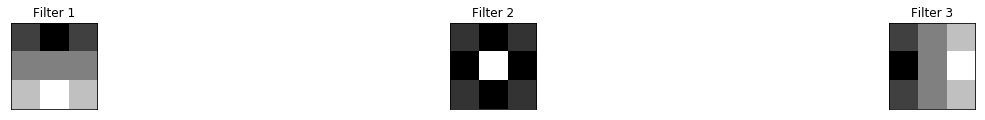

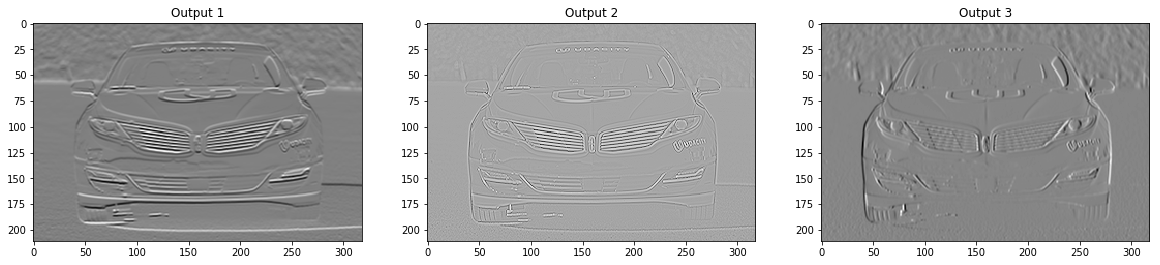

In [35]:
from helpers import plot_filters, viz_layer

# plot original image
plt.imshow(gray_img, cmap='gray')

# plot all the filters in a row
plot_filters(filters)
   
# convert the grayscale image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers from the forwrad function of our model
# with a call to `model(input)`
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the convolutional layer
viz_layer(conv_layer)

## Convolutional layer + activation

In this model, we've used an activation function that scales the output of the convolutional layer to pixel values between 0 and 1. We've chose a ReLu function to do this, and this function simply turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, `x`. 

<img src='images/relu_ex.png' height=40% width=40% />

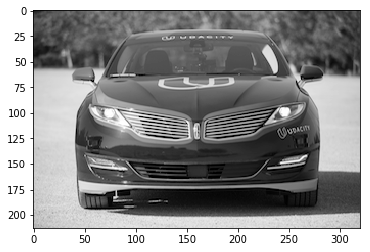

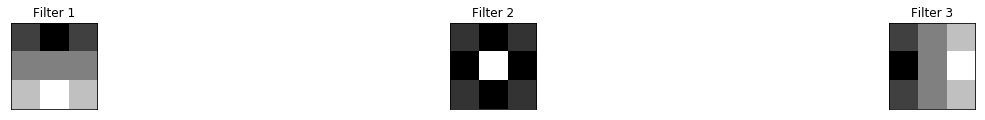

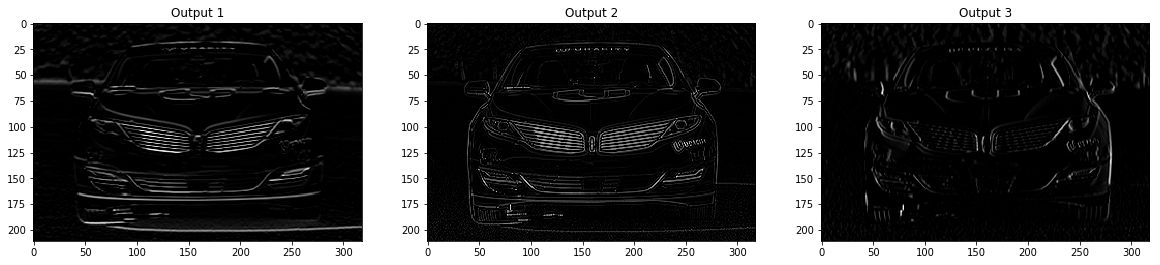

In [36]:
# plot original image
plt.imshow(gray_img, cmap='gray')
# plot all the filters in a row
plot_filters(filters)

# visualize the output of the *activated* convolutional layer
viz_layer(activated_layer)

## Maxpooling layer

Then, take a look at the output of a maxpooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor. In this case, tihs layer creates a new, smaller image of only the maximum (brightest) values in a given kernel area. The below images may look the same as the ones above, but read the values on the x and y axes, you should see that the size of thes images has reduced by some pooling factor!

<img src='images/maxpooling_ex.png' height=60% width=60% />



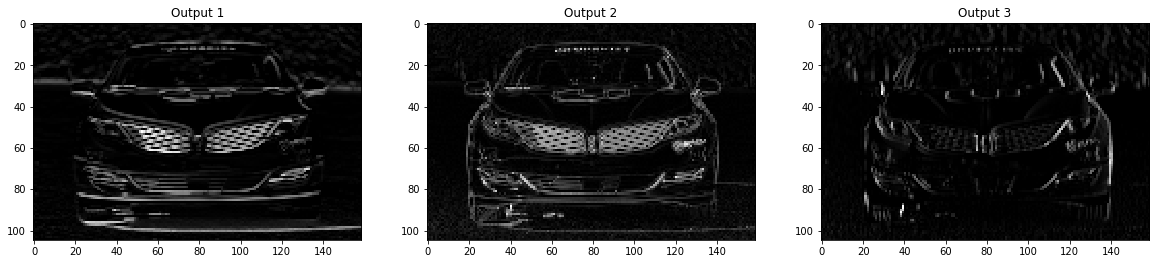

In [37]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)